
# Certificate Analysis Multi-Format

## 1. プログラムの概要と目的

### 概要
- **目的:**  
  このプログラムは、複数の証明書形式（PEM、DER、PKCS#7）に対応した証明書解析ツールです。証明書からドメイン情報を抽出し、各証明書の有効性や特徴（マルチドメインか否か、ドメイン数の分布、フォールバックの利用状況など）を分析することを目的としています。

- **利用シーン:**  
  証明書管理、セキュリティ監査、データベース上の証明書情報の品質評価など、さまざまな運用シナリオに対応します。

### 主な目的
- **多形式対応:**  
  証明書が異なるフォーマット（PEM、DER、PKCS#7）で提供された場合でも、正確にパースしドメイン情報を抽出する。

- **エラー管理:**  
  各種エラー（ASN.1 パースエラー、16進数形式のエラー、解析エラーなど）をカウント・記録し、エラー統計としてレポートに反映する。

- **フォールバック機能:**  
  プライマリ証明書の解析に失敗した場合、フォールバックデータを用いた再解析を自動で試行することで、より高い成功率を実現する。

---

## 2. 主な機能と特徴

### 主な機能
- **証明書データのクリーニングと変換:**  
  入力された証明書データ（文字列形式）を適切にクリーニングし、PEM/DER/PKCS#7 それぞれの形式に応じたバイト列に変換します。

- **ドメイン抽出:**  
  - **SAN (Subject Alternative Name) 拡張:**  
    証明書内の SAN 拡張から DNS 名を抽出。
  - **Common Name (CN):**  
    SAN に含まれていない場合、CN からもドメイン名を抽出。

- **フォールバック解析:**  
  プライマリ証明書の解析が失敗した場合、フォールバックの証明書データを用いて再解析を試み、成功した場合はその旨を結果に反映します。

- **データベース連携:**  
  PostgreSQL データベースから証明書データを取得し、動的に解析を実施。

- **詳細な結果の出力:**  
  解析結果（抽出されたドメイン情報、エラー内容、フォールバック利用状況など）を CSV ファイルとして保存。

- **解析結果の可視化:**  
  Matplotlib と日本語対応フォント（IPAexGothic、IPAPGothic、Yu Gothic）を利用し、以下の内容をグラフ化：
  - 証明書の有効性（有効/無効の割合）
  - ドメイン数の分布
  - フォールバック利用状況

### 特徴
- **多様な証明書形式に対応:**  
  PEM、DER、そして PKCS#7 の形式を自動で判別し、正しく解析。

- **エラーハンドリングの充実:**  
  発生する各種エラーを詳細に分類・集計し、解析全体の健全性をモニタリングできる。

- **再解析による信頼性向上:**  
  フォールバック機能により、一度の失敗で解析結果を諦めず、再度の解析チャンスを提供。

- **柔軟な設定:**  
  設定ファイル（JSON形式）により、データベース接続情報などを簡単に変更可能。

- **グラフィカルなレポート:**  
  統計情報やエラー統計、ドメイン数のヒストグラムなど、視覚的に把握しやすいレポートを生成。



website_data の分析を開始...
取得したレコード数: 11706

normal_sites の分析を開始...
取得したレコード数: 9591

=== 証明書分析サマリー ===

website_data:
総証明書数: 11,706
有効な証明書: 11,705 (100.0%)
無効な証明書: 1 (0.0%)

マルチドメイン証明書数: 8,815
マルチドメイン証明書の割合: 75.3%
証明書あたりの平均ドメイン数: 31.00
証明書あたりの最大ドメイン数: 139
フォールバック利用証明書数: 118 (1.0%)

ドメイン数の分布:
1ドメイン: 2,890 件 (24.7%)
2ドメイン: 3,321 件 (28.4%)
3ドメイン: 168 件 (1.4%)
4ドメイン: 137 件 (1.2%)
5ドメイン: 319 件 (2.7%)
6ドメイン: 66 件 (0.6%)
7ドメイン: 201 件 (1.7%)
8ドメイン: 181 件 (1.5%)
9ドメイン: 92 件 (0.8%)
10ドメイン: 101 件 (0.9%)
11ドメイン: 35 件 (0.3%)
12ドメイン: 39 件 (0.3%)
13ドメイン: 18 件 (0.2%)
14ドメイン: 6 件 (0.1%)
15ドメイン: 15 件 (0.1%)
16ドメイン: 26 件 (0.2%)
17ドメイン: 23 件 (0.2%)
18ドメイン: 3 件 (0.0%)
19ドメイン: 5 件 (0.0%)
20ドメイン: 71 件 (0.6%)
21ドメイン: 2 件 (0.0%)
22ドメイン: 4 件 (0.0%)
23ドメイン: 1 件 (0.0%)
24ドメイン: 35 件 (0.3%)
25ドメイン: 2 件 (0.0%)
26ドメイン: 11 件 (0.1%)
28ドメイン: 2 件 (0.0%)
29ドメイン: 6 件 (0.1%)
30ドメイン: 94 件 (0.8%)
31ドメイン: 1 件 (0.0%)
32ドメイン: 8 件 (0.1%)
33ドメイン: 1 件 (0.0%)
34ドメイン: 2 件 (0.0%)
35ドメイン: 5 件 (0.0%)
36ドメイン: 2 件 (0.0%)
38ドメイン: 3 件 (0.0%)
4

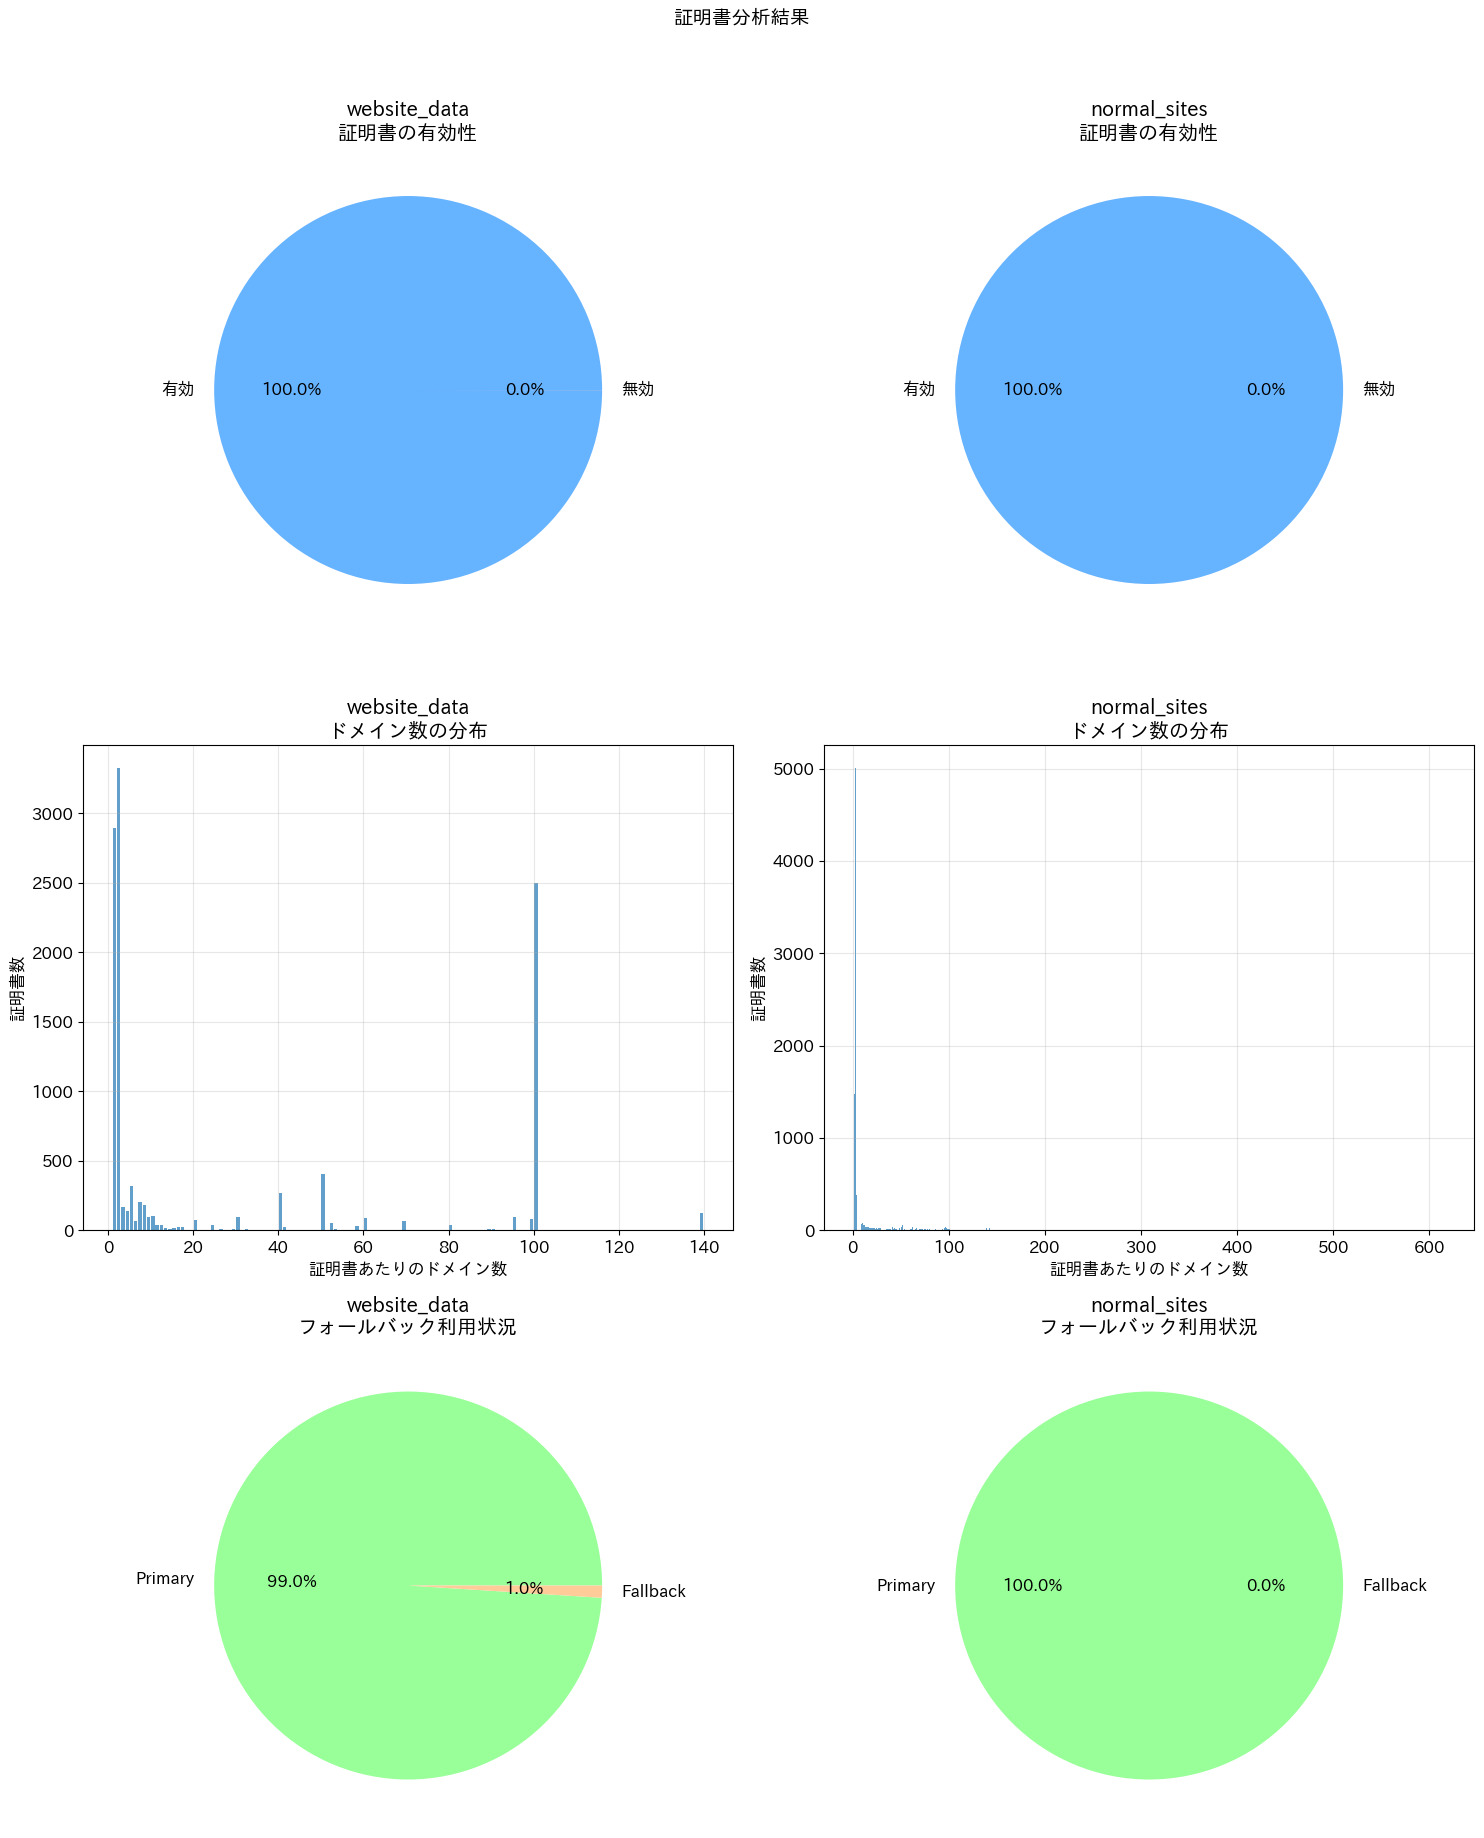

In [1]:
# 05_certificate_analysis_multi_format.ipynb
# Location: RAPIDS/notebooks/certificate_analysis/05_certificate_analysis_multi_format.ipynb

import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import json
from cryptography import x509
from cryptography.hazmat.backends import default_backend
import binascii
import matplotlib.pyplot as plt
import japanize_matplotlib
from typing import Dict, List, Optional
import re
from datetime import datetime
from pathlib import Path

class CertificateAnalyzer:
    """証明書の分析を行うクラス（複数の証明書形式に対応）"""
    
    def __init__(self, config_path: str):
        """初期化"""
        # 設定の読み込み
        with open(config_path) as f:
            self.config = json.load(f)['database']
        
        # 出力ディレクトリの設定
        self.output_dir = Path('/home/asomura/waseda/nextstep/RAPIDS/reports/certificate_analysis')
        self.output_dir.mkdir(parents=True, exist_ok=True)
        
        # フォント設定
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = ['IPAexGothic', 'IPAPGothic', 'Yu Gothic']
        
        # エラー統計の初期化
        self.error_stats = {
            'total_processed': 0,
            'success': 0,
            'failures': {
                'asn1_error': 0,
                'hex_error': 0,
                'parse_error': 0,
                'no_domain_error': 0,
                'other_error': 0
            }
        }
        
        # 詳細な結果格納用
        self.detailed_results = []

    def get_engine(self, db_name: str) -> create_engine:
        """データベース接続エンジンを取得"""
        host = '192.168.1.92' if db_name == 'website_data' else '192.168.1.92'
        return create_engine(
            f'postgresql://{self.config["user"]}:{self.config["password"]}@{host}/{db_name}'
        )

    def clean_cert_data(self, cert_data: str) -> Optional[bytes]:
        """
        DER形式の証明書が16進数文字列として与えられた場合のクリーニング。
        PEMやPKCS#7の場合はヘッダーが含まれるため、この処理はスキップされます。
        """
        try:
            if not cert_data:
                return None
            
            # すでにPEM/PKCS7形式の場合はそのまま返す（バイナリ変換は行わない）
            if "-----BEGIN" in cert_data:
                return cert_data.encode('utf-8')
            
            # \xプレフィックスとスペースの除去（hex形式の場合）
            hex_str = cert_data.replace('\\x', '').replace(' ', '')
            
            # 16進数以外の文字を除去
            hex_str = re.sub(r'[^0-9a-fA-F]', '', hex_str)
            
            # 奇数長の場合、0を追加
            if len(hex_str) % 2 != 0:
                hex_str += '0'
            
            return binascii.unhexlify(hex_str)
            
        except (binascii.Error, ValueError) as e:
            self.error_stats['failures']['hex_error'] += 1
            return None

    def load_certificate_from_data(self, cert_data: str) -> x509.Certificate:
        """
        証明書データから x509.Certificate オブジェクトを返す。
        PEM, DER, PKCS#7（PEM/DER）の各形式に対応する。
        """
        if not cert_data:
            raise ValueError("Empty certificate data")
        
        # まず、クリーンなデータを取得（PEMの場合はそのままバイト列に変換）
        raw_data = self.clean_cert_data(cert_data)
        if raw_data is None:
            raise ValueError("Invalid certificate data")
        
        try:
            # PEM形式の場合：-----BEGIN CERTIFICATE-----
            if b"-----BEGIN CERTIFICATE-----" in raw_data:
                # 複数の証明書が連結されている場合、最初のものを使用
                pem_certs = re.findall(b'(-----BEGIN CERTIFICATE-----.*?-----END CERTIFICATE-----)', raw_data, re.DOTALL)
                if pem_certs:
                    return x509.load_pem_x509_certificate(pem_certs[0], default_backend())
                else:
                    raise ValueError("No valid PEM certificate found")
            
            # PEM形式のPKCS7の場合
            if b"-----BEGIN PKCS7-----" in raw_data:
                from cryptography.hazmat.primitives.serialization import pkcs7
                pkcs7_certs = pkcs7.load_pem_pkcs7_certificates(raw_data)
                if pkcs7_certs and len(pkcs7_certs) > 0:
                    return pkcs7_certs[0]
                else:
                    raise ValueError("No valid PEM PKCS7 certificates found")
            
            # DER形式の場合（ここでは raw_data はバイナリとして渡される）
            try:
                return x509.load_der_x509_certificate(raw_data, default_backend())
            except Exception as e:
                # DER形式のPKCS7を試す
                from cryptography.hazmat.primitives.serialization import pkcs7
                pkcs7_certs = pkcs7.load_der_pkcs7_certificates(raw_data)
                if pkcs7_certs and len(pkcs7_certs) > 0:
                    return pkcs7_certs[0]
                else:
                    raise e
        
        except Exception as e:
            raise e

    def extract_domains(self, cert_data: str, original_domain: str) -> Dict:
        """証明書からドメイン情報を抽出（各種証明書形式に対応）"""
        self.error_stats['total_processed'] += 1
        
        try:
            # 証明書データから x509.Certificate オブジェクトを取得
            cert = self.load_certificate_from_data(cert_data)
            domains = set()  # 重複を避けるために set を使用
            
            # SAN (Subject Alternative Name) 拡張から取得を試みる
            for extension in cert.extensions:
                if isinstance(extension.value, x509.SubjectAlternativeName):
                    san_domains = [name.value for name in extension.value 
                                   if isinstance(name, x509.DNSName)]
                    domains.update(san_domains)
            
            # Common Name からも取得（エラーがあっても続行）
            try:
                cn = cert.subject.get_attributes_for_oid(x509.NameOID.COMMON_NAME)
                if cn:
                    domains.add(cn[0].value)
            except Exception:
                pass
            
            # ドメインリストに変換
            domain_list = sorted(list(domains))
            
            # 最低1つのドメインがなければエラー
            if not domain_list:
                self.error_stats['failures']['no_domain_error'] += 1
                return self._create_error_result(original_domain, "No valid domains found")
            
            self.error_stats['success'] += 1
            
            return {
                'original_domain': original_domain,
                'domain_count': len(domain_list),
                'domains': domain_list,
                'is_multi_domain': len(domain_list) > 1,
                'error': None
            }
            
        except ValueError as e:
            self.error_stats['failures']['parse_error'] += 1
            return self._create_error_result(original_domain, f"Parse error: {str(e)}")
            
        except Exception as e:
            if "error parsing asn1 value" in str(e).lower():
                self.error_stats['failures']['asn1_error'] += 1
                return self._create_error_result(original_domain, "ASN.1 parse error")
            else:
                self.error_stats['failures']['other_error'] += 1
                return self._create_error_result(original_domain, f"Error: {str(e)}")

    def _create_error_result(self, domain: str, error_msg: str) -> Dict:
        """エラー結果の生成"""
        return {
            'original_domain': domain,
            'domain_count': 0,
            'domains': [],
            'is_multi_domain': False,
            'error': error_msg
        }

    def extract_domains_with_fallback(self, primary_cert_data: str, fallback_cert_data: Optional[str], original_domain: str) -> Dict:
        """
        primary の証明書データでエラーの場合、fallback のデータで再試行する。
        fallback で成功した場合は、'fallback_used': True を付加する。
        """
        result = self.extract_domains(primary_cert_data, original_domain)
        if result['error'] is None:
            result['fallback_used'] = False
            return result
        else:
            # primary でエラーの場合、fallback のデータが存在すれば再試行
            if fallback_cert_data:
                fallback_result = self.extract_domains(fallback_cert_data, original_domain)
                if fallback_result['error'] is None:
                    fallback_result['fallback_used'] = True
                    return fallback_result
                else:
                    # 両方失敗の場合、エラー内容を併記
                    return self._create_error_result(
                        original_domain,
                        f"Primary error: {result['error']} / Fallback error: {fallback_result['error']}"
                    )
            else:
                return result

    def analyze_certificates(self, db_name: str) -> Dict:
        """証明書の分析を実行（フォールバック機能付き）"""
        print(f"\n{db_name} の分析を開始...")
        
        # fallback カラムも取得
        query = """
            SELECT domain, https_certificate_body, https_certificate_all
            FROM website_data 
            WHERE status = 7 
              AND (https_certificate_body IS NOT NULL OR https_certificate_all IS NOT NULL);
        """
        engine = self.get_engine(db_name)
        df = pd.read_sql_query(query, engine)
        print(f"取得したレコード数: {len(df)}")
        
        results = []
        for _, row in df.iterrows():
            primary_cert = row['https_certificate_body']
            fallback_cert = row['https_certificate_all']
            result = self.extract_domains_with_fallback(primary_cert, fallback_cert, row['domain'])
            results.append(result)
            self.detailed_results.append({
                **result, 
                'database': db_name,
                'timestamp': datetime.now()
            })
        
        # 有効な結果のみを用いて統計を計算
        valid_results = [r for r in results if r['domain_count'] > 0]
        total_certs = len(results)
        total_valid = len(valid_results)
        multi_domain_certs = sum(1 for r in valid_results if r['is_multi_domain'])
        domain_counts = [r['domain_count'] for r in valid_results]
        fallback_used_count = sum(1 for r in valid_results if r.get('fallback_used', False))
        
        return {
            'total_certificates': total_certs,
            'valid_certificates': total_valid,
            'invalid_certificates': total_certs - total_valid,
            'multi_domain_certificates': multi_domain_certs,
            'multi_domain_ratio': multi_domain_certs / total_valid if total_valid > 0 else 0,
            'domain_counts': domain_counts,
            'avg_domains_per_cert': np.mean(domain_counts) if domain_counts else 0,
            'max_domains_per_cert': max(domain_counts) if domain_counts else 0,
            'fallback_used_count': fallback_used_count,
            'fallback_used_ratio': fallback_used_count / total_valid if total_valid > 0 else 0,
            'results': results
        }

    def save_detailed_results(self, output_path: Optional[str] = None):
        """詳細な分析結果を CSV ファイルとして保存"""
        if not output_path:
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            output_path = self.output_dir / f'cert_analysis_{timestamp}.csv'
        
        df = pd.DataFrame(self.detailed_results)
        df['domains'] = df['domains'].apply(lambda x: ','.join(x) if isinstance(x, list) else '')
        df.to_csv(output_path, index=False)
        print(f"\n詳細な分析結果を保存: {output_path}")

    def print_summary(self, results: Dict[str, Dict]):
        """分析結果のサマリーを表示"""
        print("\n=== 証明書分析サマリー ===")
        
        for db_name, data in results.items():
            print(f"\n{db_name}:")
            print(f"総証明書数: {data['total_certificates']:,}")
            print(f"有効な証明書: {data['valid_certificates']:,} ({data['valid_certificates']/data['total_certificates']*100:.1f}%)")
            print(f"無効な証明書: {data['invalid_certificates']:,} ({data['invalid_certificates']/data['total_certificates']*100:.1f}%)")
            
            if data['valid_certificates'] > 0:
                print(f"\nマルチドメイン証明書数: {data['multi_domain_certificates']:,}")
                print(f"マルチドメイン証明書の割合: {data['multi_domain_ratio']:.1%}")
                print(f"証明書あたりの平均ドメイン数: {data['avg_domains_per_cert']:.2f}")
                print(f"証明書あたりの最大ドメイン数: {data['max_domains_per_cert']}")
                print(f"フォールバック利用証明書数: {data['fallback_used_count']:,} ({data['fallback_used_ratio']:.1%})")
                
                domain_counts = pd.Series(data['domain_counts'])
                print("\nドメイン数の分布:")
                for count, freq in domain_counts.value_counts().sort_index().items():
                    print(f"{count}ドメイン: {freq:,} 件 ({freq/len(domain_counts):.1%})")

    def print_error_stats(self):
        """エラー統計の表示"""
        print("\n=== エラー統計 ===")
        total = self.error_stats['total_processed']
        print(f"処理した証明書の総数: {total:,}")
        print(f"成功: {self.error_stats['success']:,} ({self.error_stats['success']/total*100:.1f}%)")
        
        print("\nエラーの内訳:")
        for error_type, count in self.error_stats['failures'].items():
            if count > 0:
                print(f"- {error_type}: {count:,} ({count/total*100:.1f}%)")

    def plot_results(self, results: Dict[str, Dict]):
        """分析結果の可視化（フォールバック利用状況も表示）"""
        plt.rcParams['font.size'] = 12
        
        # 3行2列のグリッド
        fig, axes = plt.subplots(3, 2, figsize=(15, 18))
        fig.suptitle('証明書分析結果', y=1.02, fontsize=14)
        
        for i, (db_name, data) in enumerate(results.items()):
            col = i  # 0: website_data, 1: normal_sites
            if data['total_certificates'] == 0:
                continue
            
            # 1. 証明書の有効性の円グラフ
            valid_ratio = data['valid_certificates'] / data['total_certificates']
            axes[0, col].pie([valid_ratio, 1-valid_ratio],
                             labels=['有効', '無効'],
                             autopct='%1.1f%%',
                             colors=['#66b3ff', '#ff9999'])
            axes[0, col].set_title(f'{db_name}\n証明書の有効性')
            
            # 2. ドメイン数の分布（ヒストグラム）
            if data['valid_certificates'] > 0 and data['domain_counts']:
                domain_counts = pd.Series(data['domain_counts'])
                axes[1, col].hist(domain_counts, 
                                  bins=range(1, int(max(domain_counts)) + 2),
                                  alpha=0.7,
                                  rwidth=0.8)
                axes[1, col].set_title(f'{db_name}\nドメイン数の分布')
                axes[1, col].set_xlabel('証明書あたりのドメイン数')
                axes[1, col].set_ylabel('証明書数')
                axes[1, col].grid(True, alpha=0.3)
            else:
                axes[1, col].text(0.5, 0.5, 'データなし', horizontalalignment='center')
                axes[1, col].set_title(f'{db_name}\nドメイン数の分布')
            
            # 3. フォールバック利用状況の円グラフ
            if data['valid_certificates'] > 0:
                fallback_count = data['fallback_used_count']
                primary_count = data['valid_certificates'] - fallback_count
                axes[2, col].pie([primary_count, fallback_count],
                                 labels=['Primary', 'Fallback'],
                                 autopct='%1.1f%%',
                                 colors=['#99ff99', '#ffcc99'])
                axes[2, col].set_title(f'{db_name}\nフォールバック利用状況')
            else:
                axes[2, col].text(0.5, 0.5, 'データなし', horizontalalignment='center')
                axes[2, col].set_title(f'{db_name}\nフォールバック利用状況')
        
        plt.tight_layout()

def main():
    # 設定ファイルのパス
    config_path = '/home/asomura/waseda/nextstep/RAPIDS/config/database.json'
    
    analyzer = CertificateAnalyzer(config_path)
    
    results = {
        'website_data': analyzer.analyze_certificates('website_data'),
        'normal_sites': analyzer.analyze_certificates('normal_sites')
    }
    
    analyzer.print_summary(results)
    analyzer.print_error_stats()
    analyzer.plot_results(results)
    analyzer.save_detailed_results()

if __name__ == "__main__":
    main()

# Certificate Analyzer

## プログラム概要

Certificate Analyzerは、Webサイトのデジタル証明書を分析し、フィッシングサイトと通常サイトの証明書発行パターンの違いを調査するためのPythonプログラムです。

このプログラムは以下の主要な機能を提供します：

- Webサイトのデジタル証明書データの自動抽出と解析
- 証明書発行者（Issuer）情報の統計的分析
- フィッシングサイトと通常サイトの証明書パターンの比較分析
- 分析結果の視覚化（グラフ生成）

本プログラムは、サイバーセキュリティ研究者や不正サイト検出システムの開発者が、証明書ベースの不正サイト検出手法の研究・開発に活用することを想定しています。プログラムは主にPythonで実装され、SQLデータベースに格納された証明書データを処理し、結果を表形式およびグラフ形式で出力します。


[website_data] の証明書発行者集計を開始...
取得したレコード数: 11706
抽出された発行者数: 144

[normal_sites] の証明書発行者集計を開始...
取得したレコード数: 9591
抽出された発行者数: 191
=== 上位発行者比較テーブル ===
                                                フィッシングサイト上位発行者 通常サイト上位発行者
Amazon RSA 2048 M02                                         67        478
Amazon RSA 2048 M03                                         70        443
DigiCert Global G2 TLS RSA SHA256 2020 CA1                 162        441
DigiCert TLS RSA SHA256 2020 CA1                            16        409
E1                                                         347          -
E5                                                         756        361
E6                                                         735        346
GTS CA 1D4                                                 805          -
R10                                                       2591        931
R11                                                       2964        958
R3                                     

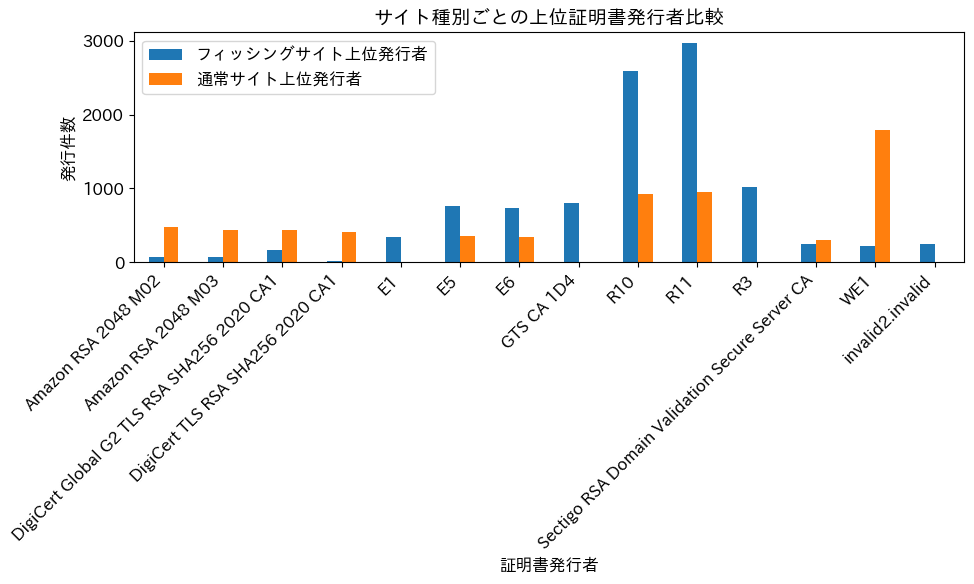

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import re
import binascii
from cryptography import x509
from cryptography.hazmat.backends import default_backend
from sqlalchemy import create_engine
from datetime import datetime
from pathlib import Path
import json

# 既存の CertificateAnalyzer クラス（05_certificate_analysis_multi_format.ipynb のコード）がある前提です

# ================================
# ① 証明書の発行者（Issuer）抽出用メソッドの追加
# ================================

def extract_issuer_from_data(self, cert_data: str) -> str:
    """
    証明書データから発行者（Issuer）情報を取得します。
    発行者の Common Name (CN) を返し、なければ文字列化した issuer 全体を返します。
    """
    try:
        cert = self.load_certificate_from_data(cert_data)
        # 発行者の CN を取得
        issuer_cn = cert.issuer.get_attributes_for_oid(x509.NameOID.COMMON_NAME)
        if issuer_cn:
            return issuer_cn[0].value
        else:
            return str(cert.issuer)
    except Exception as e:
        return None

# CertificateAnalyzer クラスにメソッドとして追加
CertificateAnalyzer.extract_issuer_from_data = extract_issuer_from_data

def extract_issuer_with_fallback(self, primary_cert_data: str, fallback_cert_data: str) -> str:
    """
    primary の証明書データから発行者を抽出し、失敗した場合は fallback を利用して再試行します。
    """
    issuer = self.extract_issuer_from_data(primary_cert_data)
    if issuer:
        return issuer
    if fallback_cert_data:
        return self.extract_issuer_from_data(fallback_cert_data)
    return None

CertificateAnalyzer.extract_issuer_with_fallback = extract_issuer_with_fallback

def analyze_issuers(self, db_name: str) -> pd.Series:
    """
    指定したデータベース内の証明書から発行者情報を抽出し、
    発行者ごとのカウント（Series）を返します。
    
    ※クエリは既存の analyze_certificates と同様に status=7 のレコードを対象としています。
    """
    print(f"\n[{db_name}] の証明書発行者集計を開始...")
    query = """
        SELECT domain, https_certificate_body, https_certificate_all
        FROM website_data 
        WHERE status = 7 
          AND (https_certificate_body IS NOT NULL OR https_certificate_all IS NOT NULL);
    """
    engine = self.get_engine(db_name)
    df = pd.read_sql_query(query, engine)
    print(f"取得したレコード数: {len(df)}")
    
    issuers = []
    for _, row in df.iterrows():
        issuer = self.extract_issuer_with_fallback(row['https_certificate_body'], row['https_certificate_all'])
        if issuer:
            issuers.append(issuer)
    
    issuer_series = pd.Series(issuers).value_counts()
    print(f"抽出された発行者数: {len(issuer_series)}")
    return issuer_series

CertificateAnalyzer.analyze_issuers = analyze_issuers

# ================================
# ② website_data と normal_sites の上位発行者の集計・比較・可視化
# ================================

# 設定ファイルのパス（環境に合わせて変更してください）
config_path = '/home/asomura/waseda/nextstep/RAPIDS/config/database.json'
analyzer = CertificateAnalyzer(config_path)

# 各データベースから発行者の集計結果（pd.Series: 発行者名を index, 発行件数を値）を取得
website_issuers = analyzer.analyze_issuers('website_data')
normal_issuers  = analyzer.analyze_issuers('normal_sites')

# 上位発行者（例：上位10件）の取得
top_n = 10
top_website = website_issuers.head(top_n)
top_normal  = normal_issuers.head(top_n)

# 両者の上位発行者の union を取得
all_top_issuers = top_website.index.union(top_normal.index)

# 比較用の DataFrame を作成（存在しない発行者は NaN → '-' 表示に後で変換）
df_compare = pd.DataFrame({
    'フィッシングサイト上位発行者': website_issuers.reindex(all_top_issuers),
    '通常サイト上位発行者': normal_issuers.reindex(all_top_issuers)
})

# 表示用テーブル：NaN を '-' に変換（棒グラフ描画は NaN を 0 扱い）
df_display = df_compare.fillna(0).astype(int).replace(0, '-')
print("=== 上位発行者比較テーブル ===")
print(df_display)

# 棒グラフ用データ（NaN は 0 として描画）
df_plot = df_compare.fillna(0).astype(int)

# グラフ描画：各発行者について、2本の棒を横並びに表示（グループド・バー）
ax = df_plot.plot(kind='bar', figsize=(10,6))
plt.title('サイト種別ごとの上位証明書発行者比較', fontsize=14)
plt.xlabel('証明書発行者', fontsize=12)
plt.ylabel('発行件数', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


# Certificate Analyzer

## プログラム概要

Certificate Analyzerは、Webサイトのデジタル証明書を分析し、フィッシングサイトと通常サイトの証明書特性の違いを調査するためのPythonプログラムです。

このプログラムは、特に以下の分析機能を提供します：

- デジタル証明書の署名アルゴリズム（SHA256 RSA、ECDSA SHA384など）の自動抽出と分析
- 証明書発行者（Issuer）情報の統計的分析
- フィッシングサイトと通常サイトの証明書使用パターンの比較
- 分析結果の視覚化（グループド・バーチャートによる比較表示）

本プログラムは、SQLデータベースに格納された証明書データを処理し、RSAやECDSAなどの公開鍵アルゴリズムとそのハッシュアルゴリズムの組み合わせを分析します。また、証明書データの読み取りに失敗した場合のフォールバック機能も備えており、より堅牢な分析を可能にします。

プログラムはサイバーセキュリティ研究者や不正サイト検出システムの開発者が、証明書の特徴に基づく不正サイト検出手法の研究・開発に活用することを想定しています。


[website_data] の証明書署名アルゴリズム集計を開始...
取得したレコード数: 11706
抽出された署名アルゴリズム数: 7

[normal_sites] の証明書署名アルゴリズム集計を開始...
取得したレコード数: 9591
抽出された署名アルゴリズム数: 5
=== 署名アルゴリズム比較テーブル ===
              フィッシングサイト  通常サイト
MD5 RSA              55      0
SHA1 RSA              7      0
SHA256 ECDSA        498   2491
SHA256 RSA         9206   5887
SHA384 ECDSA       1851    779
SHA384 RSA           88    427
SHA512 RSA            1      7


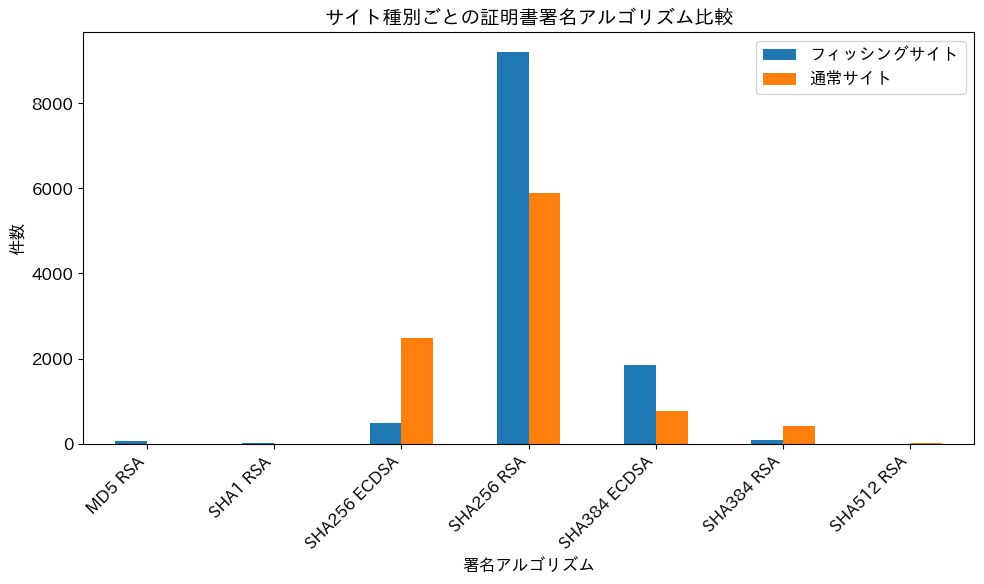

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語対応のため
import re
import binascii
import json
from datetime import datetime
from pathlib import Path

from cryptography import x509
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.asymmetric import rsa, ec

from sqlalchemy import create_engine

# ※ ここでは既存の CertificateAnalyzer クラスがある前提です
#    （load_certificate_from_data() や get_engine() などのメソッドを持つ）

# ================================
# ① 証明書から署名アルゴリズムを抽出するメソッドの追加
# ================================

def extract_signature_algorithm_from_data(self, cert_data: str) -> str:
    """
    証明書データから署名アルゴリズム（例："SHA256 RSA", "ECDSA SHA384"）を抽出します。
    1. 証明書の signature_hash_algorithm を用いてハッシュアルゴリズム（例: SHA256）を取得し大文字に変換
    2. 証明書の公開鍵の型から、RSA か ECDSA を判別
    """
    try:
        cert = self.load_certificate_from_data(cert_data)
        # ハッシュアルゴリズム名（例: 'sha256'）を大文字化
        hash_algo = cert.signature_hash_algorithm.name.upper()
        pub_key = cert.public_key()
        if isinstance(pub_key, rsa.RSAPublicKey):
            key_algo = "RSA"
        elif isinstance(pub_key, ec.EllipticCurvePublicKey):
            key_algo = "ECDSA"
        else:
            key_algo = "Unknown"
        return f"{hash_algo} {key_algo}"
    except Exception as e:
        return None

# CertificateAnalyzer クラスにメソッドとして追加
CertificateAnalyzer.extract_signature_algorithm_from_data = extract_signature_algorithm_from_data

def extract_signature_algorithm_with_fallback(self, primary_cert_data: str, fallback_cert_data: str) -> str:
    """
    primary の証明書データから署名アルゴリズムを抽出し、
    失敗した場合は fallback を利用して再試行します。
    """
    algo = self.extract_signature_algorithm_from_data(primary_cert_data)
    if algo:
        return algo
    if fallback_cert_data:
        return self.extract_signature_algorithm_from_data(fallback_cert_data)
    return None

CertificateAnalyzer.extract_signature_algorithm_with_fallback = extract_signature_algorithm_with_fallback

def analyze_signature_algorithms(self, db_name: str) -> pd.Series:
    """
    指定したデータベース内の証明書から署名アルゴリズムを抽出し、
    署名アルゴリズムごとのカウント（Series）を返します。
    
    対象は status=7 で、https_certificate_body もしくは https_certificate_all にデータがあるレコードです。
    """
    print(f"\n[{db_name}] の証明書署名アルゴリズム集計を開始...")
    query = """
        SELECT domain, https_certificate_body, https_certificate_all
        FROM website_data 
        WHERE status = 7 
          AND (https_certificate_body IS NOT NULL OR https_certificate_all IS NOT NULL);
    """
    engine = self.get_engine(db_name)
    df = pd.read_sql_query(query, engine)
    print(f"取得したレコード数: {len(df)}")
    
    sig_algos = []
    for _, row in df.iterrows():
        algo = self.extract_signature_algorithm_with_fallback(row['https_certificate_body'], row['https_certificate_all'])
        if algo:
            sig_algos.append(algo)
    
    sig_algo_series = pd.Series(sig_algos).value_counts()
    print(f"抽出された署名アルゴリズム数: {len(sig_algo_series)}")
    return sig_algo_series

CertificateAnalyzer.analyze_signature_algorithms = analyze_signature_algorithms

# ================================
# ② website_data と normal_sites の署名アルゴリズムの集計・比較・可視化
# ================================

# 設定ファイルのパス（環境に合わせて変更してください）
config_path = '/home/asomura/waseda/nextstep/RAPIDS/config/database.json'
analyzer = CertificateAnalyzer(config_path)

# 各データベースから署名アルゴリズムの集計結果（pd.Series: アルゴリズム名を index, 発行件数を値）を取得
website_sig_algs = analyzer.analyze_signature_algorithms('website_data')
normal_sig_algs  = analyzer.analyze_signature_algorithms('normal_sites')

# 上位署名アルゴリズム（例：上位10件）の取得
top_n = 10
top_website = website_sig_algs.head(top_n)
top_normal  = normal_sig_algs.head(top_n)

# 両者の上位署名アルゴリズムの union を取得
all_top_algos = top_website.index.union(top_normal.index)

# 比較用の DataFrame を作成（存在しないアルゴリズムは 0 として扱います）
df_compare = pd.DataFrame({
    'フィッシングサイト': website_sig_algs.reindex(all_top_algos, fill_value=0),
    '通常サイト': normal_sig_algs.reindex(all_top_algos, fill_value=0)
})

# 表示用テーブル
print("=== 署名アルゴリズム比較テーブル ===")
print(df_compare)

# 棒グラフ描画（グループド・バー形式）
ax = df_compare.plot(kind='bar', figsize=(10,6))
plt.title('サイト種別ごとの証明書署名アルゴリズム比較', fontsize=14)
plt.xlabel('署名アルゴリズム', fontsize=12)
plt.ylabel('件数', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


# Certificate Analyzer

## プログラム概要

Certificate Analyzerは、Webサイトのデジタル証明書を総合的に分析し、フィッシングサイトと通常サイトの証明書特性の違いを調査するためのPythonプログラムです。

このプログラムは、以下の主要な分析機能を提供します：

1. 証明書の時間的特性分析
   - 有効期間（開始日・終了日）の抽出と統計分析
   - 証明書の発行時期の推移分析
   - 有効期間の分布分析（ヒストグラム・ボックスプロット）

2. 証明書の技術的特性分析
   - 署名アルゴリズム（SHA256 RSA、ECDSA SHA384など）の抽出と分析
   - 証明書発行者（Issuer）情報の統計的分析

3. 比較分析機能
   - フィッシングサイトと通常サイトの証明書特性の比較
   - 複数の可視化方法（グループド・バーチャート、ヒストグラム、時系列プロット）

本プログラムは、SQLデータベースに格納された証明書データを処理し、証明書の有効期限パターン、技術仕様、発行状況などを多角的に分析します。証明書データの読み取りに失敗した場合のフォールバック機能も備えており、より堅牢な分析を実現します。



[website_data] の証明書有効期限情報の集計を開始...
取得したレコード数: 11706


/tmp/ipykernel_1674/634613320.py:30: CryptographyDeprecationWarning: Properties that return a naïve datetime object have been deprecated. Please switch to not_valid_before_utc.
  nvb = cert.not_valid_before
/tmp/ipykernel_1674/634613320.py:31: CryptographyDeprecationWarning: Properties that return a naïve datetime object have been deprecated. Please switch to not_valid_after_utc.
  nva = cert.not_valid_after


有効期限情報を抽出できたレコード数: 11706

[normal_sites] の証明書有効期限情報の集計を開始...
取得したレコード数: 9591
有効期限情報を抽出できたレコード数: 9591
=== フィッシングサイトの証明書有効期間統計量 ===
count    11706.000000
mean       302.808560
std       1066.460833
min         29.000000
25%         89.000000
50%         89.000000
75%         89.000000
max      36500.000000
Name: validity_days, dtype: float64

=== 通常サイトの証明書有効期間統計量 ===
count    9591.000000
mean      230.902826
std       144.945120
min        14.000000
25%        89.000000
50%       180.000000
75%       393.000000
max       397.000000
Name: validity_days, dtype: float64


/tmp/ipykernel_1674/634613320.py:108: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([validity_website['validity_days'], validity_normal['validity_days']], labels=['フィッシングサイト', '通常サイト'])


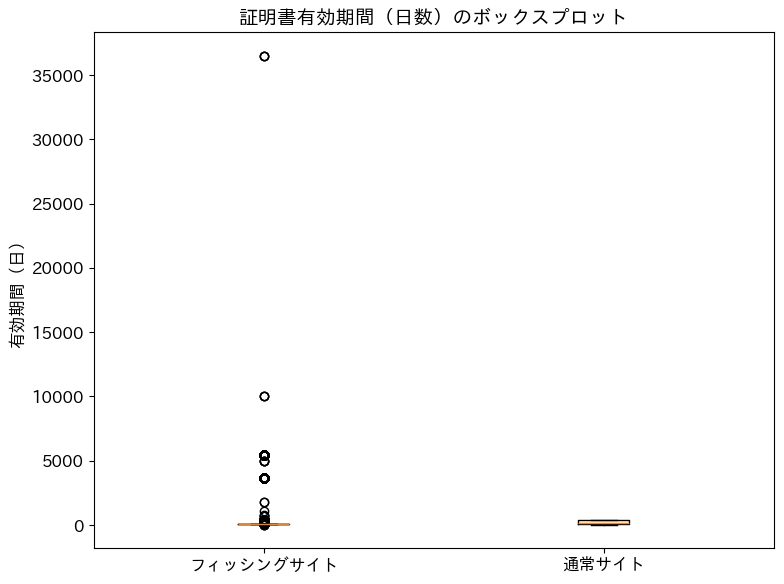

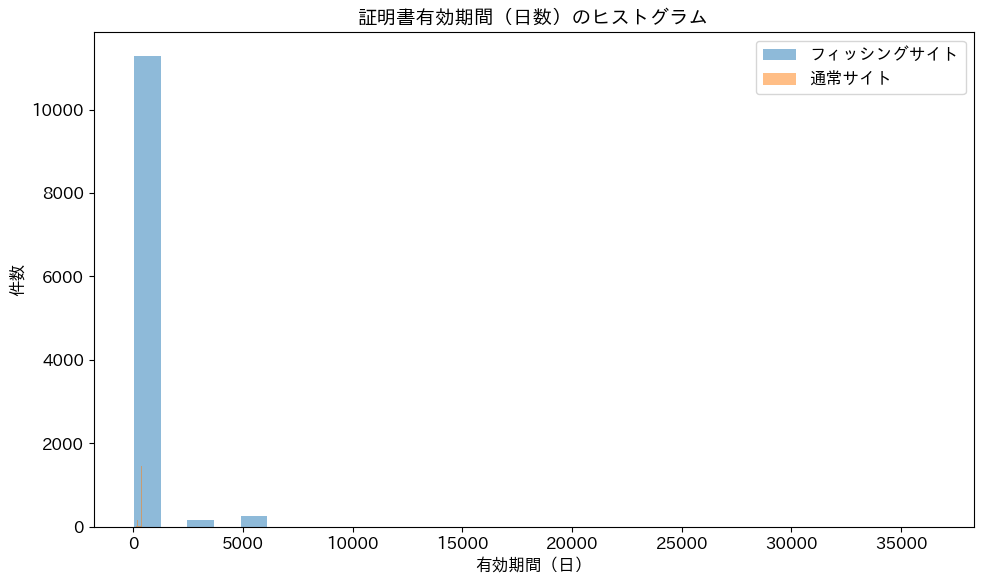

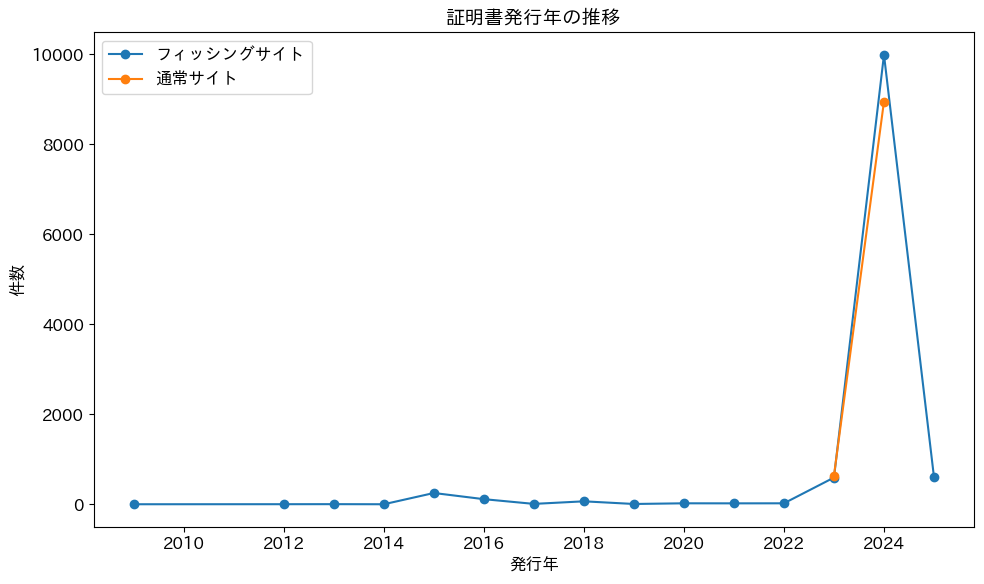

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語対応のため
import json
from datetime import datetime
from pathlib import Path

from cryptography import x509
from cryptography.hazmat.backends import default_backend

from sqlalchemy import create_engine

# ※ 本サンプルは、すでに実装済みの CertificateAnalyzer クラスが存在し、
#    load_certificate_from_data() や get_engine() メソッドが利用できる前提です。

# ================================
# ① 証明書の有効期限情報抽出用メソッドの追加
# ================================

def extract_validity_info_from_data(self, cert_data: str) -> dict:
    """
    証明書データから以下の情報を抽出します:
      - not_valid_before: 証明書の有効開始日時（発行日）
      - not_valid_after:  証明書の有効終了日時（失効日）
      - validity_days:    有効期間（日数）
    """
    try:
        cert = self.load_certificate_from_data(cert_data)
        nvb = cert.not_valid_before
        nva = cert.not_valid_after
        validity_days = (nva - nvb).days
        return {
            'not_valid_before': nvb,
            'not_valid_after': nva,
            'validity_days': validity_days
        }
    except Exception as e:
        return None

# CertificateAnalyzer クラスにメソッドとして追加
CertificateAnalyzer.extract_validity_info_from_data = extract_validity_info_from_data

def extract_validity_info_with_fallback(self, primary_cert_data: str, fallback_cert_data: str) -> dict:
    """
    primary の証明書データから有効期限情報を抽出し、
    失敗した場合は fallback の証明書データで再試行します。
    """
    info = self.extract_validity_info_from_data(primary_cert_data)
    if info:
        return info
    if fallback_cert_data:
        return self.extract_validity_info_from_data(fallback_cert_data)
    return None

CertificateAnalyzer.extract_validity_info_with_fallback = extract_validity_info_with_fallback

def analyze_validity_periods(self, db_name: str) -> pd.DataFrame:
    """
    指定したデータベース内の証明書から、有効開始日時、終了日時、有効期間（日数）を抽出し、
    それぞれのドメインごとにまとめた DataFrame を返します。
    
    対象は status=7 で、https_certificate_body もしくは https_certificate_all に証明書データが存在するレコードです。
    """
    print(f"\n[{db_name}] の証明書有効期限情報の集計を開始...")
    query = """
        SELECT domain, https_certificate_body, https_certificate_all
        FROM website_data 
        WHERE status = 7 
          AND (https_certificate_body IS NOT NULL OR https_certificate_all IS NOT NULL);
    """
    engine = self.get_engine(db_name)
    df = pd.read_sql_query(query, engine)
    print(f"取得したレコード数: {len(df)}")
    
    validity_list = []
    for _, row in df.iterrows():
        info = self.extract_validity_info_with_fallback(row['https_certificate_body'], row['https_certificate_all'])
        if info:
            info['domain'] = row['domain']
            validity_list.append(info)
    validity_df = pd.DataFrame(validity_list)
    print(f"有効期限情報を抽出できたレコード数: {len(validity_df)}")
    return validity_df

CertificateAnalyzer.analyze_validity_periods = analyze_validity_periods

# ================================
# ② website_data と normal_sites の有効期限・発行期間の分析・可視化
# ================================

# 設定ファイルのパス（環境に合わせて変更してください）
config_path = '/home/asomura/waseda/nextstep/RAPIDS/config/database.json'
analyzer = CertificateAnalyzer(config_path)

# 各データベースから有効期限情報を取得
validity_website = analyzer.analyze_validity_periods('website_data')
validity_normal  = analyzer.analyze_validity_periods('normal_sites')

# --- 有効期間（日数）の統計量を表示 ---
print("=== フィッシングサイトの証明書有効期間統計量 ===")
print(validity_website['validity_days'].describe())
print("\n=== 通常サイトの証明書有効期間統計量 ===")
print(validity_normal['validity_days'].describe())

# --- 有効期間（日数）のボックスプロット ---
plt.figure(figsize=(8,6))
plt.boxplot([validity_website['validity_days'], validity_normal['validity_days']], labels=['フィッシングサイト', '通常サイト'])
plt.title('証明書有効期間（日数）のボックスプロット', fontsize=14)
plt.ylabel('有効期間（日）', fontsize=12)
plt.tight_layout()
plt.show()

# --- 有効期間（日数）のヒストグラム ---
plt.figure(figsize=(10,6))
plt.hist(validity_website['validity_days'], bins=30, alpha=0.5, label='フィッシングサイト')
plt.hist(validity_normal['validity_days'], bins=30, alpha=0.5, label='通常サイト')
plt.title('証明書有効期間（日数）のヒストグラム', fontsize=14)
plt.xlabel('有効期間（日）', fontsize=12)
plt.ylabel('件数', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# --- 発行期間（not_valid_before）の分布 ---
# 発行日の「年」ごとに集計
validity_website['発行年'] = pd.to_datetime(validity_website['not_valid_before']).dt.year
validity_normal['発行年']  = pd.to_datetime(validity_normal['not_valid_before']).dt.year

count_website = validity_website['発行年'].value_counts().sort_index()
count_normal  = validity_normal['発行年'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.plot(count_website.index, count_website.values, marker='o', label='フィッシングサイト')
plt.plot(count_normal.index, count_normal.values, marker='o', label='通常サイト')
plt.title('証明書発行年の推移', fontsize=14)
plt.xlabel('発行年', fontsize=12)
plt.ylabel('件数', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


# Certificate Analyzer

## プログラム概要

Certificate Analyzerは、Webサイトのデジタル証明書を詳細に分析し、フィッシングサイトと通常サイトの証明書特性の違いを調査するためのPythonプログラムです。

このプログラムは、以下の分析機能を提供します：

1. 証明書の有効期間分析
   - 有効期間の詳細な区間分析（60日刻みの分布分析）
   - 3年（1095日）を上限とした期間分布の可視化
   - 有効開始日・終了日の時系列分析

2. 技術仕様分析
   - 署名アルゴリズム（SHA256 RSA、ECDSA SHA384など）の分析
   - 証明書発行者（Issuer）情報の統計分析

3. 高度な統計分析機能
   - 期間別の証明書分布のヒストグラム生成
   - フィッシングサイトと通常サイトの特性比較
   - データのビン分割による詳細な分布分析

本プログラムは、SQLデータベースから証明書データを取得し、有効期間に基づく特徴抽出や分布分析を行います。特に、60日単位での詳細な期間分析により、フィッシングサイトと通常サイトの証明書有効期間パターンの違いを明確に可視化することができます。

このツールは、サイバーセキュリティ研究者や不正サイト検出システムの開発者による、証明書の有効期間特性に基づく不正サイト検出手法の研究・開発を支援します。

フィッシングサイト（website_data）の証明書情報を取得中...

[website_data] の証明書有効期限情報の集計を開始...
取得したレコード数: 11706


/tmp/ipykernel_1674/634613320.py:30: CryptographyDeprecationWarning: Properties that return a naïve datetime object have been deprecated. Please switch to not_valid_before_utc.
  nvb = cert.not_valid_before
/tmp/ipykernel_1674/634613320.py:31: CryptographyDeprecationWarning: Properties that return a naïve datetime object have been deprecated. Please switch to not_valid_after_utc.
  nva = cert.not_valid_after


有効期限情報を抽出できたレコード数: 11706
通常サイト（normal_sites）の証明書情報を取得中...

[normal_sites] の証明書有効期限情報の集計を開始...
取得したレコード数: 9591
有効期限情報を抽出できたレコード数: 9591


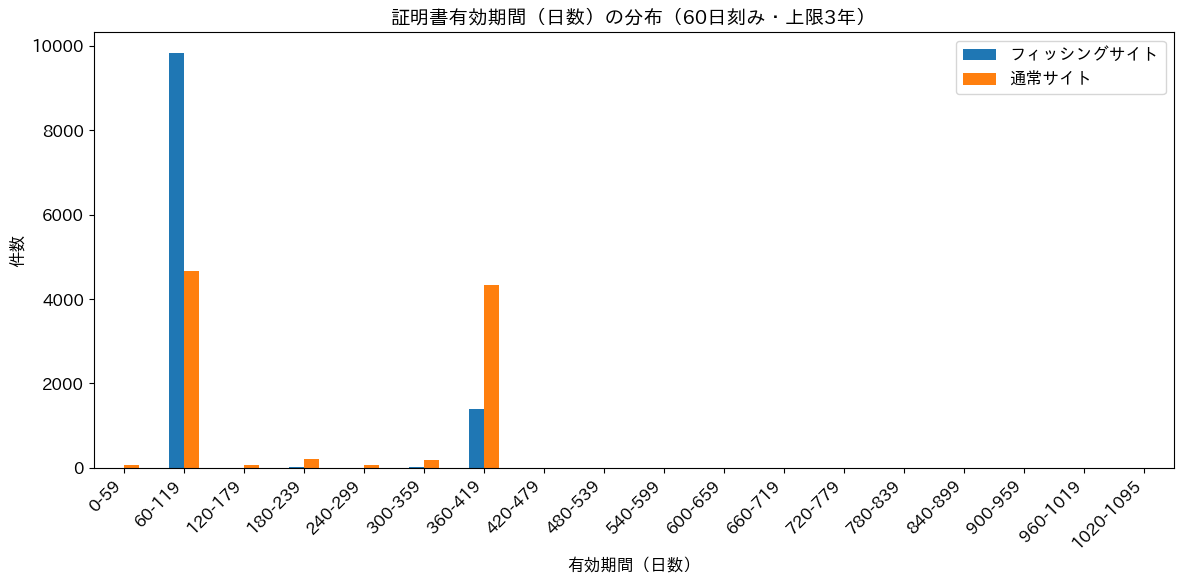

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語フォント対応

# ※ ここでは、既に CertificateAnalyzer クラスに analyze_validity_periods メソッドが追加済みで、
#    各データベースから有効期限情報を抽出できるものとします。

# 例：設定ファイルのパスに合わせて修正してください
config_path = '/home/asomura/waseda/nextstep/RAPIDS/config/database.json'
analyzer = CertificateAnalyzer(config_path)

# 各データベースから有効期限情報（DataFrame: 'not_valid_before', 'not_valid_after', 'validity_days'）を取得
print("フィッシングサイト（website_data）の証明書情報を取得中...")
validity_website = analyzer.analyze_validity_periods('website_data')
print("通常サイト（normal_sites）の証明書情報を取得中...")
validity_normal  = analyzer.analyze_validity_periods('normal_sites')

# 3年（1095日）を上限として表示するため、1095日より長い証明書は除外
validity_website_clipped = validity_website[validity_website['validity_days'] <= 1095]
validity_normal_clipped  = validity_normal[validity_normal['validity_days']  <= 1095]

# 60日刻みのビンを作成
# ※ np.arange(0,1095,60) では上限が 1080 までとなるため、最後のビンは 1020～1095日（幅75日）に調整
bins = np.append(np.arange(0, 1080, 60), 1095)

# 各ビンのラベルを作成（例："0-59", "60-119", ...、最後は "1020-1095"）
labels = []
for i in range(len(bins)-1):
    # 右端は bins[i+1]-1 としています（ただし、最後は「1095」を明示）
    if i < len(bins)-2:
        labels.append(f"{bins[i]}-{bins[i+1]-1}")
    else:
        labels.append(f"{bins[i]}-{bins[i+1]}")

# pd.cut を用いて、各証明書の有効期間（validity_days）をビン分けし、件数をカウント
website_binned = pd.cut(validity_website_clipped['validity_days'], bins=bins, right=False, include_lowest=True)
normal_binned  = pd.cut(validity_normal_clipped['validity_days'], bins=bins, right=False, include_lowest=True)

website_counts = website_binned.value_counts().sort_index()
normal_counts  = normal_binned.value_counts().sort_index()

# 両者のカウントを比較用の DataFrame にまとめる
df_bins = pd.DataFrame({
    'フィッシングサイト': website_counts,
    '通常サイト': normal_counts
})
df_bins.index = labels  # インデックスにラベルを設定

# グループド・バーグラフの描画
ax = df_bins.plot(kind='bar', figsize=(12, 6))
plt.title('証明書有効期間（日数）の分布（60日刻み・上限3年）', fontsize=14)
plt.xlabel('有効期間（日数）', fontsize=12)
plt.ylabel('件数', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
